In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from numpy import arange
import math
import seaborn as sns

In [80]:
imustat = pd.read_csv('imu_stat-imu.csv')

In [81]:
imustat.keys()

Index(['time', '.Header.seq', '.Header.stamp.secs', '.Header.stamp.nsecs',
       '.Header.frame_id', '.IMU.header.seq', '.IMU.header.stamp.secs',
       '.IMU.header.stamp.nsecs', '.IMU.header.frame_id', '.IMU.orientation.x',
       '.IMU.orientation.y', '.IMU.orientation.z', '.IMU.orientation.w',
       '.IMU.orientation_covariance', '.IMU.angular_velocity.x',
       '.IMU.angular_velocity.y', '.IMU.angular_velocity.z',
       '.IMU.angular_velocity_covariance', '.IMU.linear_acceleration.x',
       '.IMU.linear_acceleration.y', '.IMU.linear_acceleration.z',
       '.IMU.linear_acceleration_covariance', '.MagField.header.seq',
       '.MagField.header.stamp.secs', '.MagField.header.stamp.nsecs',
       '.MagField.header.frame_id', '.MagField.magnetic_field.x',
       '.MagField.magnetic_field.y', '.MagField.magnetic_field.z',
       '.MagField.magnetic_field_covariance', '.VNYMR'],
      dtype='object')

In [82]:
time=[]
x = imustat["time"][0]
m0 = float(x.split(":")[1])
sec0 = float(x.split(":")[2])
for i in imustat["time"][1:]:
    x = i
    m =float(x.split(':')[1])
    sec = float(x.split(":")[2])
    t = (m - m0)*60 + sec-sec0
    time.append(t)


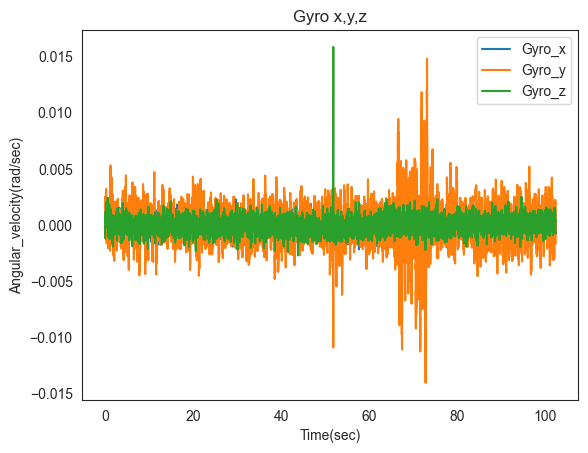

In [83]:
plt.plot(time,imustat[".IMU.angular_velocity.x"][1:],label = 'Gyro_x')
plt.plot(time,imustat[".IMU.angular_velocity.y"][1:],label = 'Gyro_y')
plt.plot(time,imustat[".IMU.angular_velocity.z"][1:],label = 'Gyro_z')
plt.xlabel("Time(sec)")
plt.ylabel('Angular_velocity(rad/sec)')
plt.title("Gyro x,y,z")
plt.legend()
plt.show()

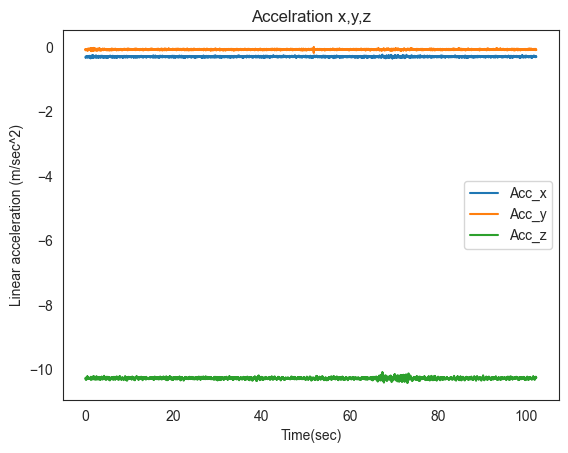

In [84]:
plt.plot(time,imustat[".IMU.linear_acceleration.x"][1:],label = 'Acc_x')
plt.plot(time,imustat[".IMU.linear_acceleration.y"][1:],label = 'Acc_y')
plt.plot(time,imustat[".IMU.linear_acceleration.z"][1:],label = 'Acc_z')
plt.xlabel("Time(sec)")
plt.ylabel('Linear acceleration (m/sec^2)')
plt.title("Accelration x,y,z")
plt.legend()
plt.show()

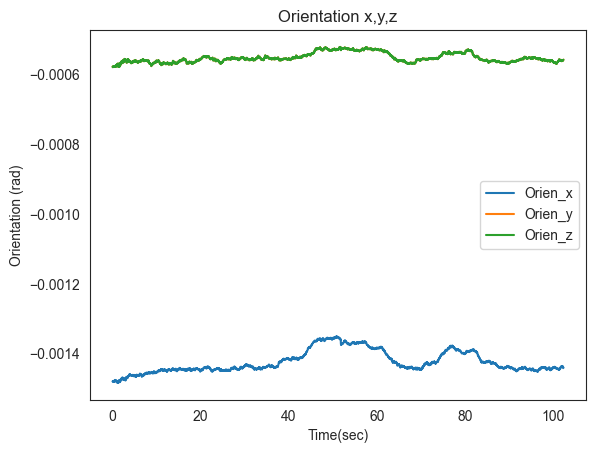

In [98]:
def euler_from_quaternion(quat):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        x, y, z, w = quat 
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return roll_x, pitch_y, yaw_z # in radians

roll = []
pitch = []
yaw = []
for i in zip(imustat[".IMU.orientation.x"][1:],imustat[".IMU.orientation.y"][1:],imustat[".IMU.orientation.z"][1:],imustat[".IMU.orientation.x"][1:]):
    euler = euler_from_quaternion(i)
    roll.append(euler[0])
    pitch.append(euler[1])
    yaw.append(euler[1])
plt.plot(time,roll,label = 'Orien_x')
plt.plot(time,pitch,label = 'Orien_y')
plt.plot(time,yaw,label = 'Orien_z')

plt.xlabel("Time(sec)")
plt.ylabel('Orientation (rad)')
plt.title("Orientation x,y,z")
plt.legend()
plt.show()

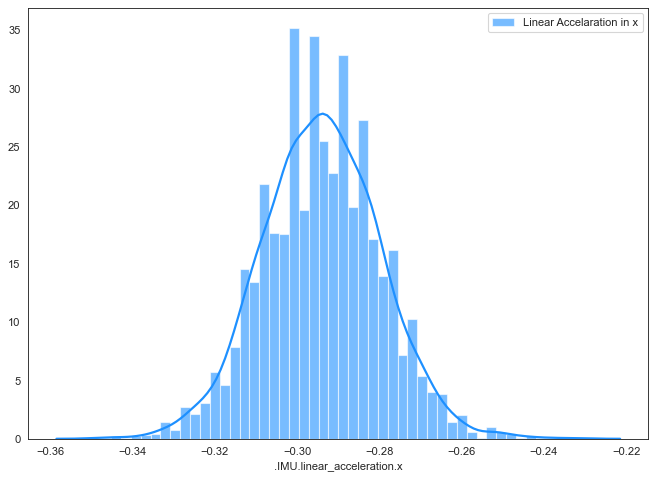

In [37]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(imustat[".IMU.linear_acceleration.x"][1:], color="dodgerblue", label="Linear Accelaration in x", **kwargs)
plt.legend();

In [45]:
error = np.array(imustat[".IMU.linear_acceleration.x"])
mean = np.mean(error)
median = np.median(error)
std = np.std(error)
print("Mean is" + str(mean))
print("Median is" + str(mean))
print("Standard Deviation is" + str(mean))

Mean is-0.294124633431085
Median is-0.294124633431085
Standard Deviation is-0.294124633431085


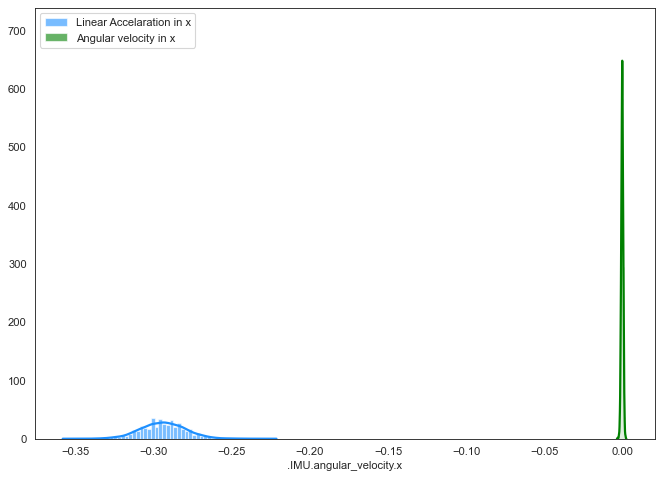

In [100]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(imustat[".IMU.linear_acceleration.x"][1:], color="dodgerblue", label="Linear Accelaration in x", **kwargs)
sns.distplot(imustat[".IMU.angular_velocity.x"][1:], color="green", label="Angular velocity in x", **kwargs)
plt.legend();

In [102]:
imumov = pd.read_csv('imu_mov-imu.csv')

In [110]:
time2 = []
for i in imumov['.Header.stamp.secs'][1:]:
    time2.append(i - imumov['.Header.stamp.secs'][0])

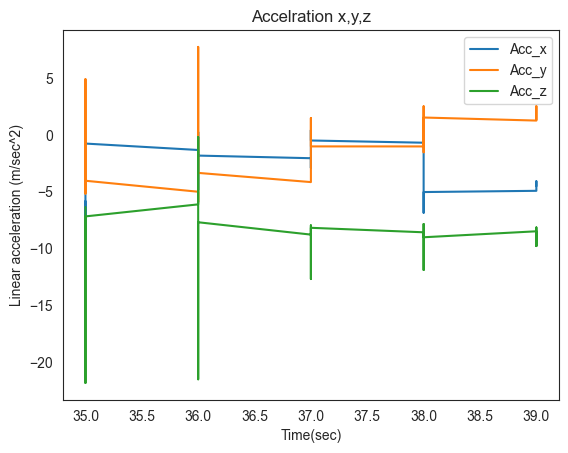

In [125]:
plt.plot(time2[1400:],imumov[".IMU.linear_acceleration.x"][1401:],label = 'Acc_x')
plt.plot(time2[1400:],imumov[".IMU.linear_acceleration.y"][1401:],label = 'Acc_y')
plt.plot(time2[1400:],imumov[".IMU.linear_acceleration.z"][1401:],label = 'Acc_z')
plt.xlabel("Time(sec)")
plt.ylabel('Linear acceleration (m/sec^2)')
plt.title("Accelration x,y,z")
plt.legend()
plt.show()

In [123]:
print(time2[1400])

35
